# Modeling Exercises

__Step 1__

Select a dataset with a continuous target variable.

I will use the Swiss data set.

In [10]:
import numpy as np
import pandas as pd
from pydataset import data
import wrangle
import evaluate
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

In [2]:
swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


__Step 2__

Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

* All values are numeric
* There are no missing values

In [4]:
#Split data into train, test, validate
train, test, validate = wrangle.train_validate_test_split(swiss)

In [5]:
#Create X and y groups
X_train, y_train = train.drop('Fertility', axis = 1), train.Fertility
X_validate, y_validate = validate.drop('Fertility', axis = 1), validate.Fertility
X_test, y_test = test.drop('Fertility', axis = 1), test.Fertility

In [6]:
#Scale the X data sets
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

__Step 3__

Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

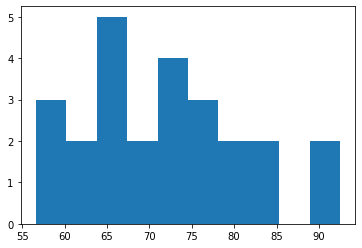

In [8]:
#Before moving forward, let's take a look at the target distribution
plt.hist(y_train)
plt.show()

The distribution appears somewhat normal.

__Baseline__

In [13]:
#Change y_train and y_validate to be data frames so we can store the baseline values in them
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

#Calculate baseline based on mean
baseline_mean_pred = y_train.Fertility.mean()
y_train['baseline_mean_pred'] = baseline_mean_pred
y_validate['baseline_mean_pred'] = baseline_mean_pred

#Calculate baseline based on median
baseline_median_pred = y_train.Fertility.median()
y_train['baseline_median_pred'] = baseline_median_pred
y_validate['baseline_median_pred'] = baseline_median_pred

#Calculate RMSE based on mean
train_RMSE = mean_squared_error(y_train.Fertility, y_train['baseline_mean_pred']) ** .5
validate_RMSE = mean_squared_error(y_validate.Fertility, y_validate['baseline_mean_pred']) ** .5

print("RMSE using Mean\nTrain/In-Sample: ", round(train_RMSE, 2), 
      "\nValidate/Out-of-Sample: ", round(validate_RMSE, 2),
     "\n")

#Calculate RMSE based on median
train_RMSE = mean_squared_error(y_train.Fertility, y_train['baseline_median_pred']) ** .5
validate_RMSE = mean_squared_error(y_validate.Fertility, y_validate['baseline_median_pred']) ** .5

print("RMSE using Median\nTrain/In-Sample: ", round(train_RMSE, 2), 
      "\nValidate/Out-of-Sample: ", round(validate_RMSE, 2))

RMSE using Mean
Train/In-Sample:  9.77 
Validate/Out-of-Sample:  15.03 

RMSE using Median
Train/In-Sample:  9.78 
Validate/Out-of-Sample:  15.05


__OLS__

In [14]:
#Create the model
lm = LinearRegression(normalize = True)

#Fit the model on scaled data
lm.fit(X_train_scaled, y_train.Fertility)

#Make predictions
y_train['lm_preds'] = lm.predict(X_train_scaled)
y_validate['lm_preds'] = lm.predict(X_validate_scaled)

#Calculate RMSE
train_RMSE = mean_squared_error(y_train.Fertility, y_train['lm_preds']) ** .5
validate_RMSE = mean_squared_error(y_validate.Fertility, y_validate['lm_preds']) ** .5

print("RMSE using OLS\nTrain/In-Sample: ", round(train_RMSE, 2), 
      "\nValidate/Out-of-Sample: ", round(validate_RMSE, 2))

RMSE using OLS
Train/In-Sample:  4.57 
Validate/Out-of-Sample:  10.68


__LassoLars__

In [15]:
#Create the model
lars = LassoLars(alpha = 1)

#Fit the model on scaled data
lars.fit(X_train_scaled, y_train.Fertility)

#Make predictions
y_train['lars_preds'] = lars.predict(X_train_scaled)
y_validate['lars_preds'] = lars.predict(X_validate_scaled)

#Calculate RMSE
train_RMSE = mean_squared_error(y_train.Fertility, y_train['lars_preds']) ** .5
validate_RMSE = mean_squared_error(y_validate.Fertility, y_validate['lars_preds']) ** .5

print("RMSE using LassoLars\nTrain/In-Sample: ", round(train_RMSE, 2), 
      "\nValidate/Out-of-Sample: ", round(validate_RMSE, 2))

RMSE using LassoLars
Train/In-Sample:  8.9 
Validate/Out-of-Sample:  14.45


__GLM__

In [18]:
#Create the model
glm = TweedieRegressor(power = 0, alpha = 0)

#Fit the model on scaled data
glm.fit(X_train_scaled, y_train.Fertility)

#Make predictions
y_train['glm_preds'] = glm.predict(X_train_scaled)
y_validate['glm_preds'] = glm.predict(X_validate_scaled)

#Calculate RMSE
train_RMSE = mean_squared_error(y_train.Fertility, y_train['glm_preds']) ** .5
validate_RMSE = mean_squared_error(y_validate.Fertility, y_validate['glm_preds']) ** .5

print("RMSE using GLM\nTrain/In-Sample: ", round(train_RMSE, 2), 
      "\nValidate/Out-of-Sample: ", round(validate_RMSE, 2))

RMSE using GLM
Train/In-Sample:  4.57 
Validate/Out-of-Sample:  10.68


__Polynomial__

In [19]:
#Create new features
pf = PolynomialFeatures(degree = 2)

#Fit to scaled data
X_train_degree2 = pf.fit_transform(X_train_scaled)

#Transform for validate and test as well
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)

#Now use linear regression with new features
lm2 = LinearRegression(normalize = True)

#Fit the model
lm2.fit(X_train_degree2, y_train.Fertility)

#Make predicitons
y_train['poly_preds'] = lm2.predict(X_train_degree2)
y_validate['poly_preds'] = lm2.predict(X_validate_degree2)

#Calculate RMSE
train_RMSE = mean_squared_error(y_train.Fertility, y_train['poly_preds']) ** .5
validate_RMSE = mean_squared_error(y_validate.Fertility, y_validate['poly_preds']) ** .5

print("RMSE using Polynomial Features\nTrain/In-Sample: ", round(train_RMSE, 2), 
      "\nValidate/Out-of-Sample: ", round(validate_RMSE, 2))

RMSE using Polynomial Features
Train/In-Sample:  2.59 
Validate/Out-of-Sample:  59.77


__Evaluate__

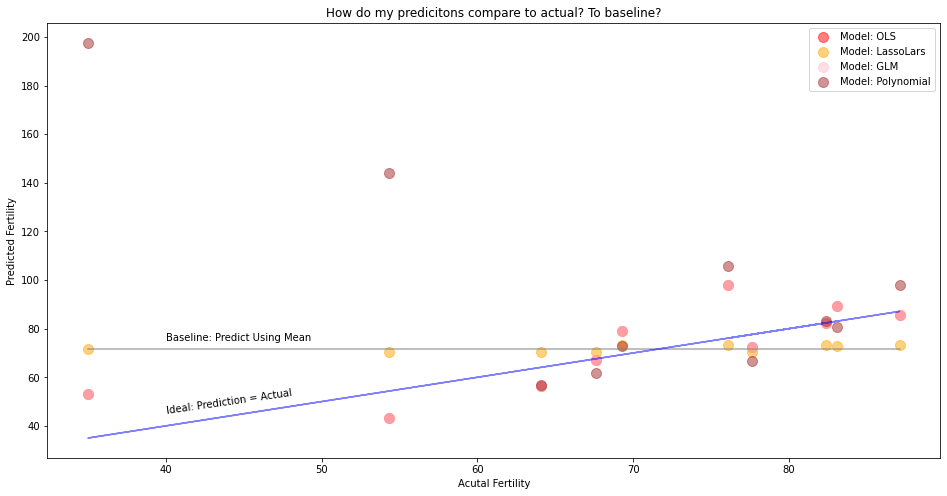

In [30]:
#Plot predicted compared to actual
plt.figure(figsize = (16, 8))
plt.plot(y_validate.Fertility, y_validate['baseline_mean_pred'], alpha = 0.5, color='gray', label='_nolegend_')
plt.annotate('Baseline: Predict Using Mean', (40, 75))
plt.plot(y_validate.Fertility, y_validate.Fertility, alpha = 0.5, color='blue', label='_nolegend_')
plt.annotate('Ideal: Prediction = Actual', (40, 45), rotation=8.25)

plt.scatter(y_validate.Fertility, y_validate['lm_preds'], 
            color = 'red', s=100, alpha = 0.5, label='Model: OLS')
plt.scatter(y_validate.Fertility, y_validate['lars_preds'],
           color = 'orange', s=100, alpha = 0.5, label = 'Model: LassoLars')
plt.scatter(y_validate.Fertility, y_validate['glm_preds'],
           color = 'pink', s = 100, alpha = 0.5, label = 'Model: GLM')
plt.scatter(y_validate.Fertility, y_validate['poly_preds'],
           color = 'brown', s = 100, alpha = 0.5, label = 'Model: Polynomial')
plt.legend()
plt.xlabel('Acutal Fertility')
plt.ylabel('Predicted Fertility')
plt.title('How do my predicitons compare to actual? To baseline?')
plt.show()

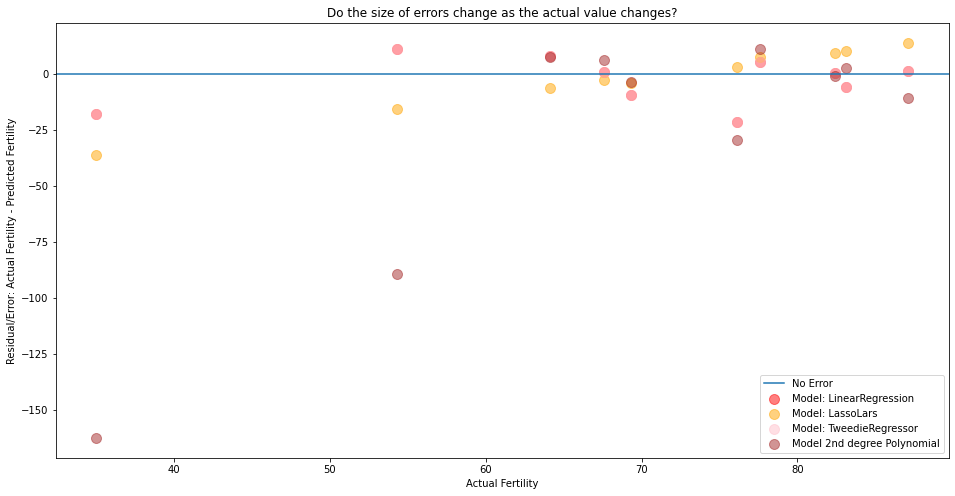

In [32]:
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.Fertility, y_validate.Fertility - y_validate['lm_preds'], 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.Fertility, y_validate.Fertility - y_validate['lars_preds'], 
            alpha=.5, color="orange", s=100, label="Model: LassoLars")
plt.scatter(y_validate.Fertility, y_validate.Fertility - y_validate['glm_preds'], 
            alpha=.5, color="pink", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.Fertility, y_validate.Fertility - y_validate['poly_preds'], 
            alpha=.5, color="brown", s=100, label="Model 2nd degree Polynomial")

plt.legend()
plt.xlabel("Actual Fertility")
plt.ylabel("Residual/Error: Actual Fertility - Predicted Fertility")
plt.title("Do the size of errors change as the actual value changes?")
plt.show()

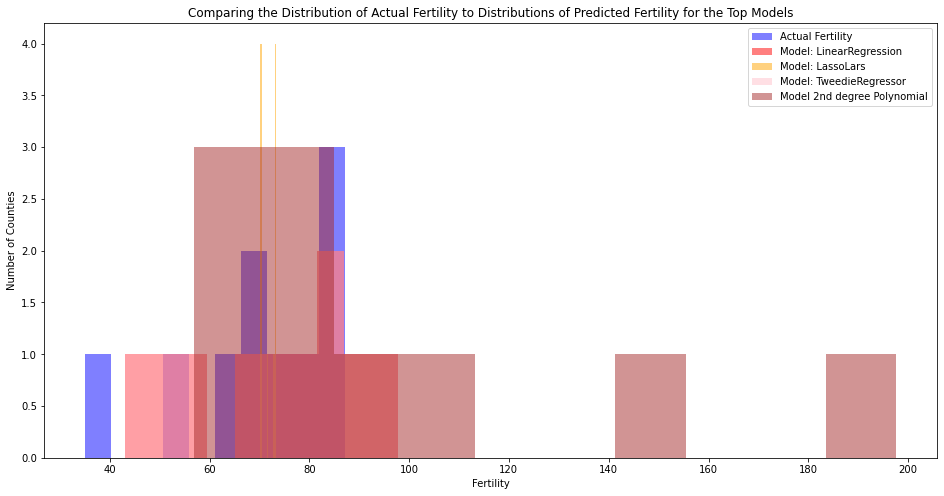

In [33]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.Fertility, color='blue', alpha=.5, label="Actual Fertility")
plt.hist(y_validate['lm_preds'], color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate['lars_preds'], color = 'orange', alpha = .5, label = 'Model: LassoLars')
plt.hist(y_validate['glm_preds'], color='pink', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate['poly_preds'], color='brown', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("Fertility")
plt.ylabel("Number of Counties")
plt.title("Comparing the Distribution of Actual Fertility to Distributions of Predicted Fertility for the Top Models")
plt.legend()
plt.show()

__My Chosen Model: LinearRegression__

In [37]:
#Change y_train and y_validate to be data frames so we can store the baseline values in them
y_test = pd.DataFrame(y_test)

#Make predictions
y_test['lm_preds'] = lm.predict(X_test_scaled)

#Calculate RMSE
test_RMSE = mean_squared_error(y_test.Fertility, y_test['lm_preds']) ** .5

print("RMSE for OLS using Linear Regression\nTest: ", round(train_RMSE, 2))

RMSE for OLS using Linear Regression
Test:  2.59
